# EDA - Univariate Analysis

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import httpimport

from pathlib import Path

In [42]:
# Import personal library
with httpimport.github_repo("junclemente", "jcds", ref="master"):
    import jcds.eda as jq

In [43]:
datasets = Path("../datasets")
df = pd.read_csv(datasets / "school_clean.csv")
df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,0.0
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,0.0
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,0.0


## Distributions

### Continuous Features

In [44]:
# Set global color palette
global_color = "colorblind"
# Set global color for Seaborn
sns.set_palette(global_color)
# Set global color palette for Matplotlib
colors = sns.color_palette(global_color)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

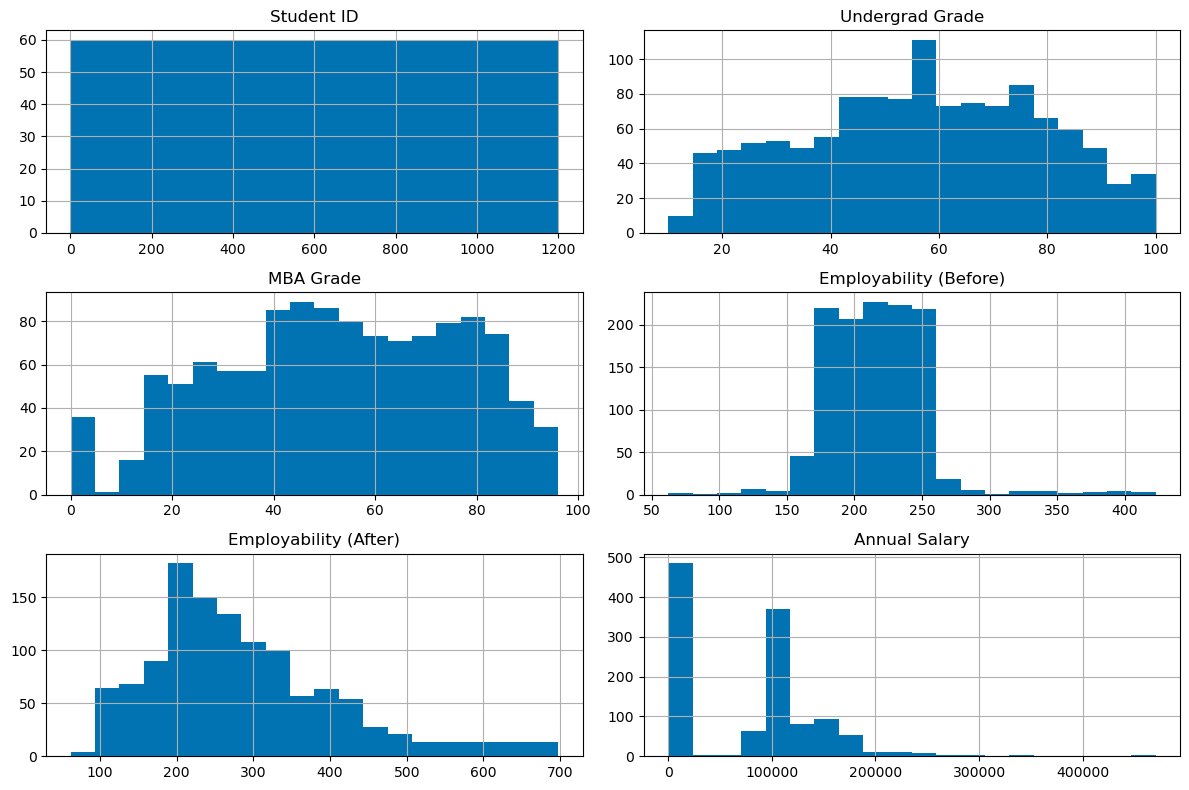

In [45]:
# Show histogram of each continuous variable
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

- Undergrad Grade shows a normal distribution. 
- MBA Grade has a somewhat normal distribution but values at 0 may be outliers. This could also be related to students who dropped out or did not place after graduation.
- Employability variables are both skewed to the left but the range in "After" has increased. 
- Annual Salary shows a left skew with most students that placed at around $100K. The 0s are all graduates who did not place. 

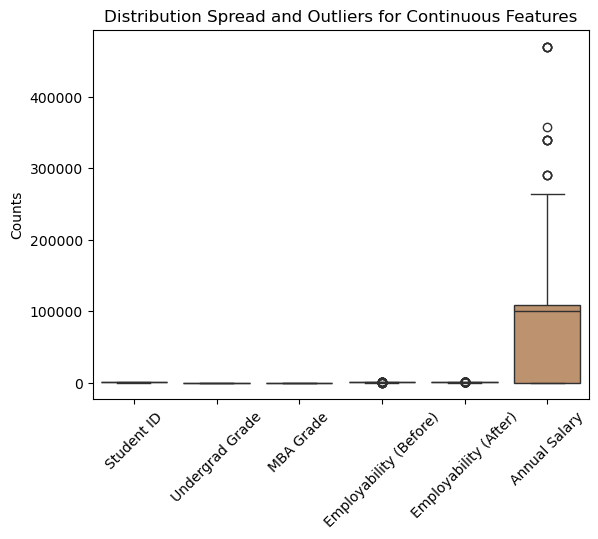

In [46]:
# Visualize outliers
sns.boxplot(data=df)
plt.title("Distribution Spread and Outliers for Continuous Features")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

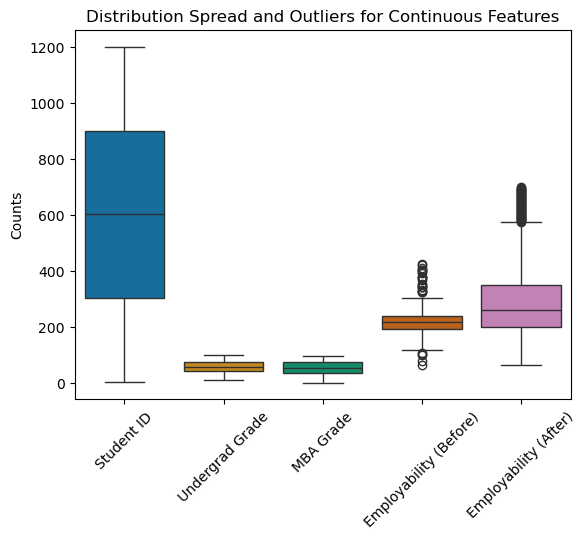

In [47]:
# Remove annual salary to show detail of other columns
sns.boxplot(data=df.drop(columns=["Annual Salary"]))
plt.title("Distribution Spread and Outliers for Continuous Features")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

### Categorical Features

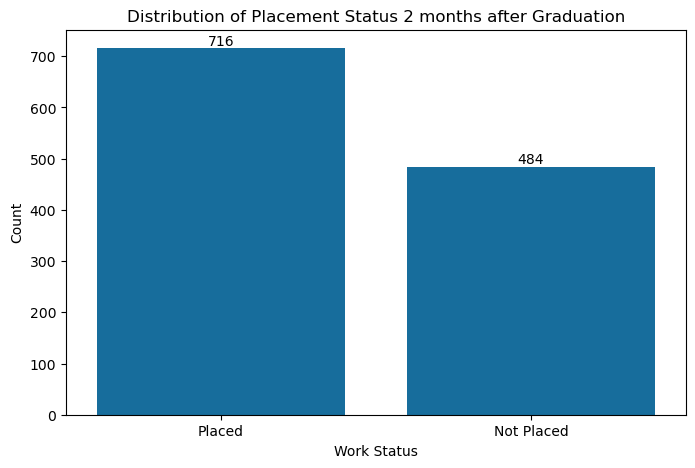

In [48]:
# categorical_vars = ["Undergrad Degree", "Work Experience", "Status"]
# Status
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Status", data=df)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Distribution of Placement Status 2 months after Graduation")
plt.xlabel("Work Status")
plt.ylabel("Count")
plt.show()

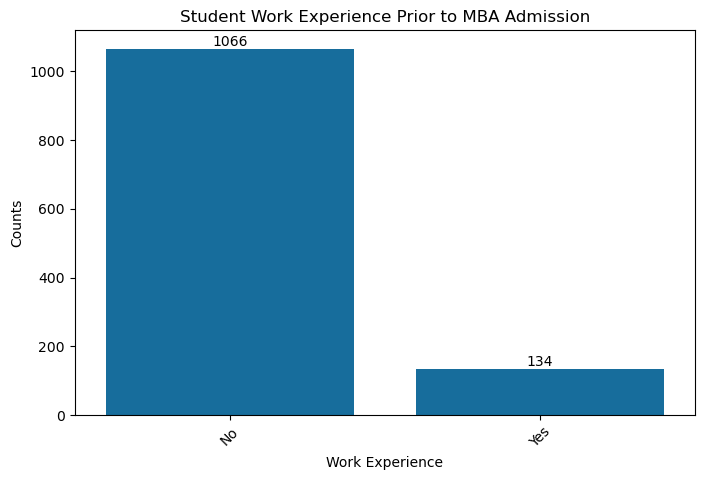

In [49]:
# Work Experience
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Work Experience", data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title(f"Student Work Experience Prior to MBA Admission")
plt.xlabel("Work Experience")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

Most MBA students did not have prior work experience before entering the program. 

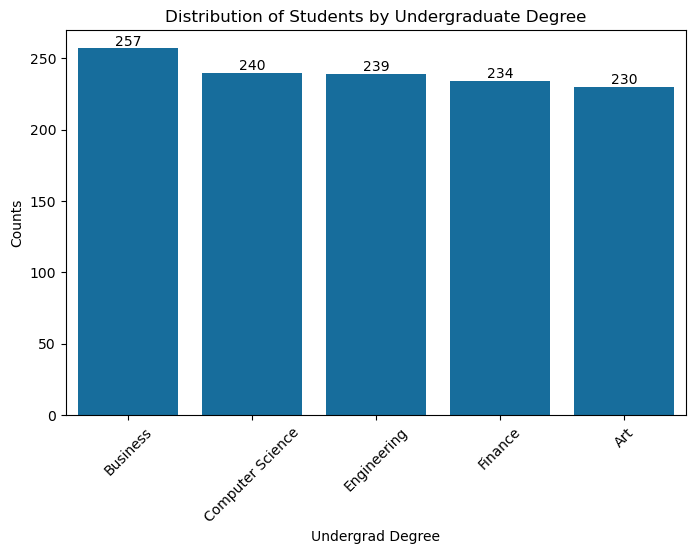

In [50]:
# Undergrad Degree
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Undergrad Degree", data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title(f"Distribution of Students by Undergraduate Degree")
# plt.xlabel("Undergraduate Degree")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

In [51]:
crosstab = pd.crosstab(df["Status"], df["Work Experience"])
display(crosstab)

Work Experience,No,Yes
Status,,
Not Placed,478,6
Placed,588,128


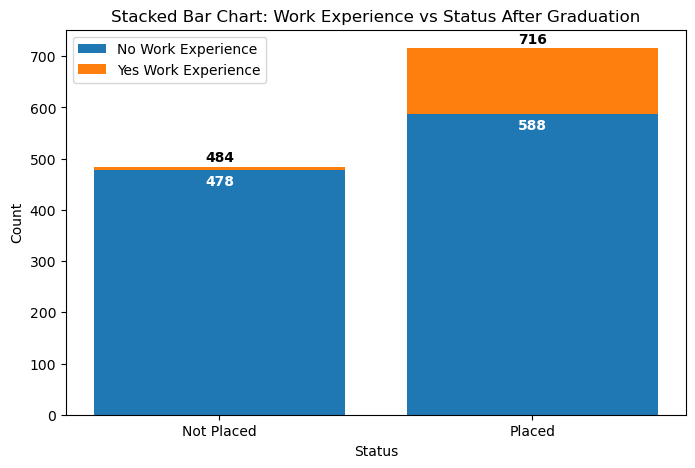

In [52]:
plt.figure(figsize=(8, 5))

# Plot the bars manually for 'No' and 'Yes' work experience
bars1 = plt.bar(
    crosstab.index, crosstab["No"], label="No Work Experience", color="#1f77b4"
)
bars2 = plt.bar(
    crosstab.index,
    crosstab["Yes"],
    bottom=crosstab["No"],
    label="Yes Work Experience",
    color="#ff7f0e",
)

# Add number counts on top of each bar for 'No Work Experience'
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height - 30,
        "%d" % int(height),
        ha="center",
        color="white",
        fontweight="bold",
    )

# Add number counts on top of each bar for 'Yes Work Experience'
for bar in bars2:
    height = bar.get_height() + bar.get_y()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 10,
        "%d" % int(height),
        ha="center",
        color="black",
        fontweight="bold",
    )

# Add labels and title
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Stacked Bar Chart: Work Experience vs Status After Graduation")
plt.legend()

# Show the plot
plt.show()